In [27]:
import numpy as np
import gym
import gym_gridworlds
import matplotlib.pyplot as plt

In [65]:
env = gym.make('Cliff-v0')
# state: (row, col) = (4, 12)
# action: 0: (-1,0), 1: (0,1), 2: (1,0), 3: (0,-1)
print(env.observation_space, env.action_space)

# env test
state = env.reset()
for _ in range(1):
    action = env.action_space.sample()
    state, reward, terminal, info = env.step(action)
    print(state, action, reward, terminal)
    if terminal:
        state, info = env.reset()
env.close()

Tuple(Discrete(4), Discrete(12)) Discrete(4)
(3, 0) 1 -100 False


In [54]:
# Q function
def grid2table(s):
    return s[0]*12+s[1]

# epsilon greed:
def e_greedy(env, q, e):
    if np.random.uniform(0,1) > e:
        a = np.argmax(q)
    else:
        a = env.action_space.sample()
    return a

In [125]:
# SARSA
episode = 500
alpha = 0.1
epsilon = 0.1
S = 10
rewards_sarsa_avg = np.zeros((S, episode))

for s in range(S):
    Q_sarsa = np.zeros(shape=(4*12,4))
    states_sarsa = [[] for _ in range(episode)]
    actions_sarsa = [[] for _ in range(episode)]
    rewards_sarsa = [[] for _ in range(episode)]
    for i in range(episode):
        state = env.reset()
        terminal = False
        state_pos = grid2table(state)
        action = e_greedy(env, Q_sarsa[state_pos], epsilon)

        while not terminal:
            new_state, reward, terminal, info = env.step(action)
            states_sarsa[i].append(state)
            actions_sarsa[i].append(action)
            rewards_sarsa[i].append(reward)

            new_state_pos = grid2table(new_state)
            new_action = e_greedy(env, Q_sarsa[new_state_pos], epsilon)
            Q_sarsa[state_pos][action] += alpha*( reward + Q_sarsa[new_state_pos][new_action] - Q_sarsa[state_pos][action] )
            state = new_state
            action = new_action
            state_pos = grid2table(state)

        rewards_sarsa_avg[s][i] = sum(rewards_sarsa[i])


In [126]:
# Q-learning
episode = 500
alpha = 0.1
epsilon = 0.1
S = 10
rewards_q_avg = np.zeros((S, episode))

for s in range(S):
    Q_q = np.zeros(shape=(4*12,4))
    states_q = [[] for _ in range(episode)]
    actions_q = [[] for _ in range(episode)]
    rewards_q = [[] for _ in range(episode)]
    for i in range(episode):
        state = env.reset()
        terminal = False
        state_pos = grid2table(state)
        while not terminal:
            action = e_greedy(env, Q_q[state_pos], epsilon)
            new_state, reward, terminal, info = env.step(action)
            states_q[i].append(state)
            actions_q[i].append(action)
            rewards_q[i].append(reward)
            
            new_state_pos = grid2table(new_state)
            new_action = np.argmax(Q_q[new_state_pos])
            Q_q[state_pos][action] += alpha*( reward + Q_q[new_state_pos][new_action] - Q_q[state_pos][action] )
            state = new_state
            action = new_action
            state_pos = grid2table(state)

        rewards_q_avg[s][i] = sum(rewards_q[i])

Text(0.5, 1.0, 'Sum of rewards during episode')

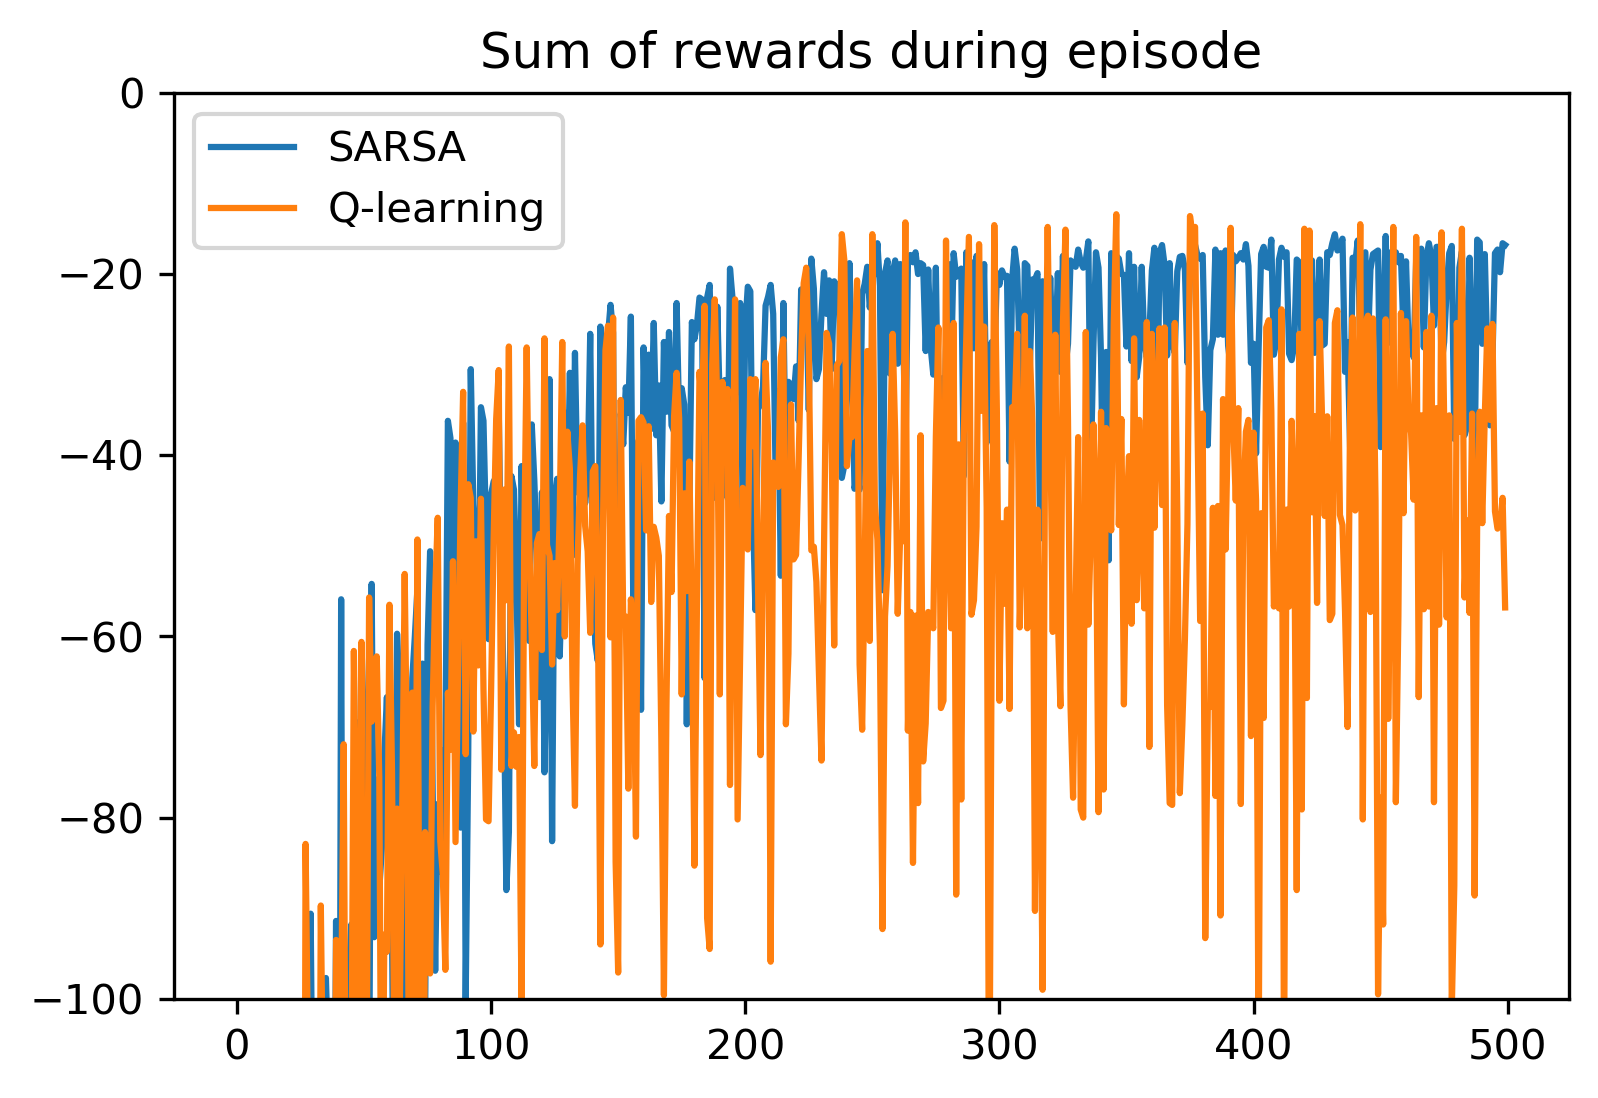

In [127]:
fig, ax = plt.subplots(dpi=300)
ax.set_ylim(-100,0)
ax.plot(np.arange(episode), rewards_sarsa_avg.mean(axis=0), label='SARSA')
ax.plot(np.arange(episode), rewards_q_avg.mean(axis=0), label='Q-learning')
ax.legend()
ax.set_title('Sum of rewards during episode')



In [129]:
print(f'SARSA: {actions_sarsa[-1]}')
print(f'Q-learning: {actions_q[-1]}')

SARSA: [0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2]
Q-learning: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
